# Credit Card Fraud Detection using Machine Learning
**Author:** Mallikarjun Reddy Banelli
**University:** Clarkson University

This notebook demonstrates a machine learning approach to detecting fraudulent credit card transactions using a Kaggle dataset.

## Introduction
This project aims to build and compare machine learning models for detecting credit card fraud using a balanced dataset.
We apply SMOTE for class balancing and evaluate models using confusion matrices and key classification metrics.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pandas as pd
from imblearn.over_sampling import SMOTE

In [24]:
df = pd.read_csv("creditcard.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


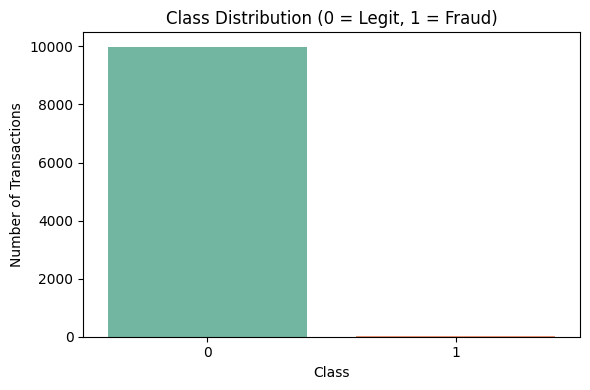

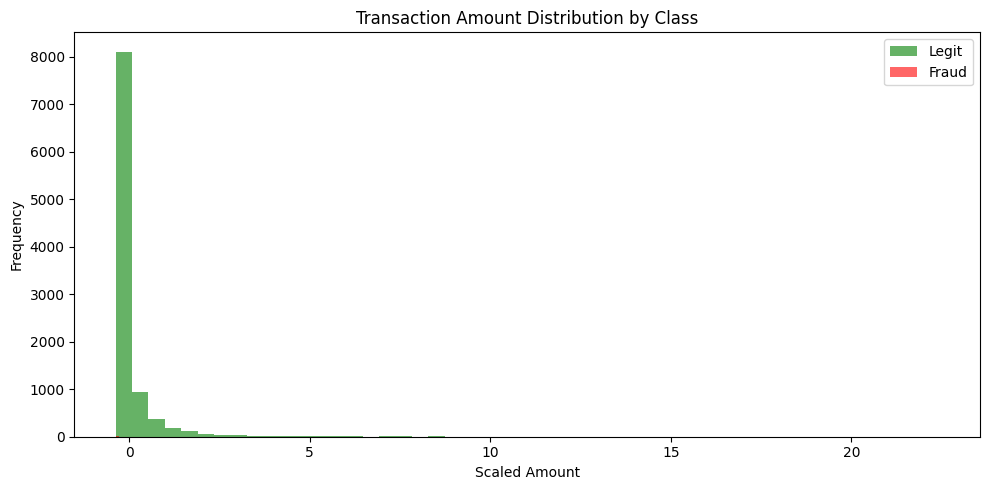

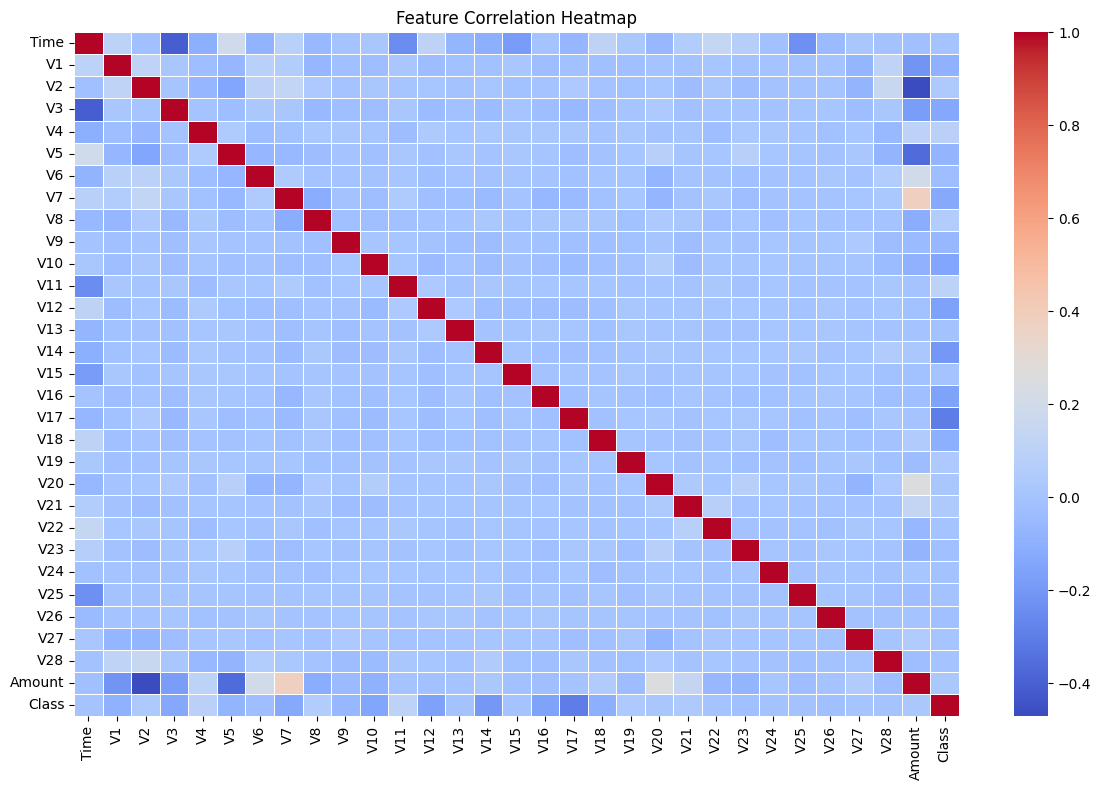

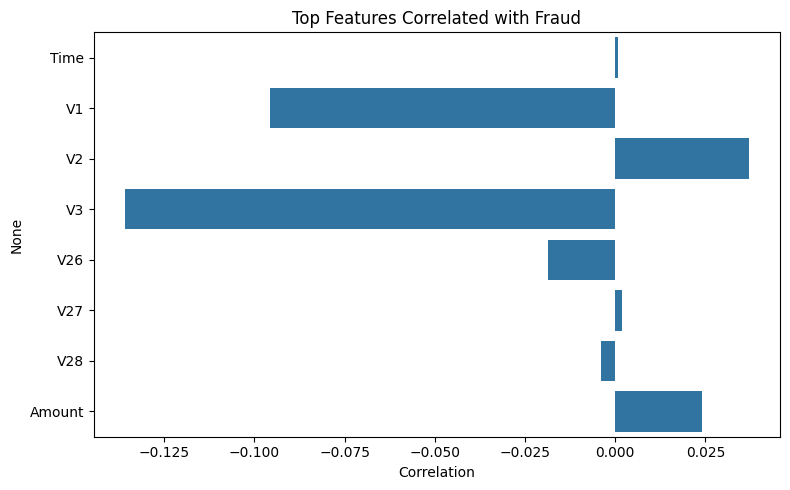

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
df = pd.read_csv("creditcard.csv")
df_sample = df.sample(n=10000, random_state=42)
df_sample['Amount'] = StandardScaler().fit_transform(df_sample[['Amount']])

# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', hue='Class', data=df_sample, palette='Set2', legend=False)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.xlabel("Class")
plt.ylabel("Number of Transactions")
plt.tight_layout()
plt.savefig("plot1_class_distribution.png")
plt.show()

# 2. Transaction Amount Distribution by Class
plt.figure(figsize=(10, 5))
plt.hist(df_sample[df_sample['Class'] == 0]['Amount'], bins=50, alpha=0.6, label='Legit', color='green')
plt.hist(df_sample[df_sample['Class'] == 1]['Amount'], bins=50, alpha=0.6, label='Fraud', color='red')
plt.title("Transaction Amount Distribution by Class")
plt.xlabel("Scaled Amount")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.savefig("plot2_amount_by_class.png")
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_sample.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("plot3_correlation_heatmap.png")
plt.show()

# 4. Top Features Correlated with Fraud Class
corr = df_sample.corr()['Class'].drop('Class')
top_corr = pd.concat([corr.head(4), corr.tail(4)])

plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top Features Correlated with Fraud")
plt.xlabel("Correlation")
plt.tight_layout()
plt.savefig("plot4_top_correlated_features.png")
plt.show()


In [31]:
# Preprocessing
df = df.drop(columns=["Time"], errors="ignore")
df["Amount"] = StandardScaler().fit_transform(df[["Amount"]])

# Features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE
from imblearn.over_sampling import SMOTE
print(f"Before SMOTE: {sum(y_train == 1)} frauds and {sum(y_train == 0)} normal transactions")

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print(f"After SMOTE: {sum(y_res == 1)} frauds and {sum(y_res == 0)} normal transactions")


Before SMOTE: 394 frauds and 227451 normal transactions
After SMOTE: 227451 frauds and 227451 normal transactions


In [32]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load your dataset
df = pd.read_csv("creditcard.csv")

# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Combine back to a single DataFrame
df_smote = pd.DataFrame(X_res, columns=X.columns)
df_smote['Class'] = y_res

# Save the new dataset
df_smote.to_csv("creditcard_after_smote.csv", index=False)


In [34]:
df = pd.read_csv("creditcard_after_smote.csv")
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


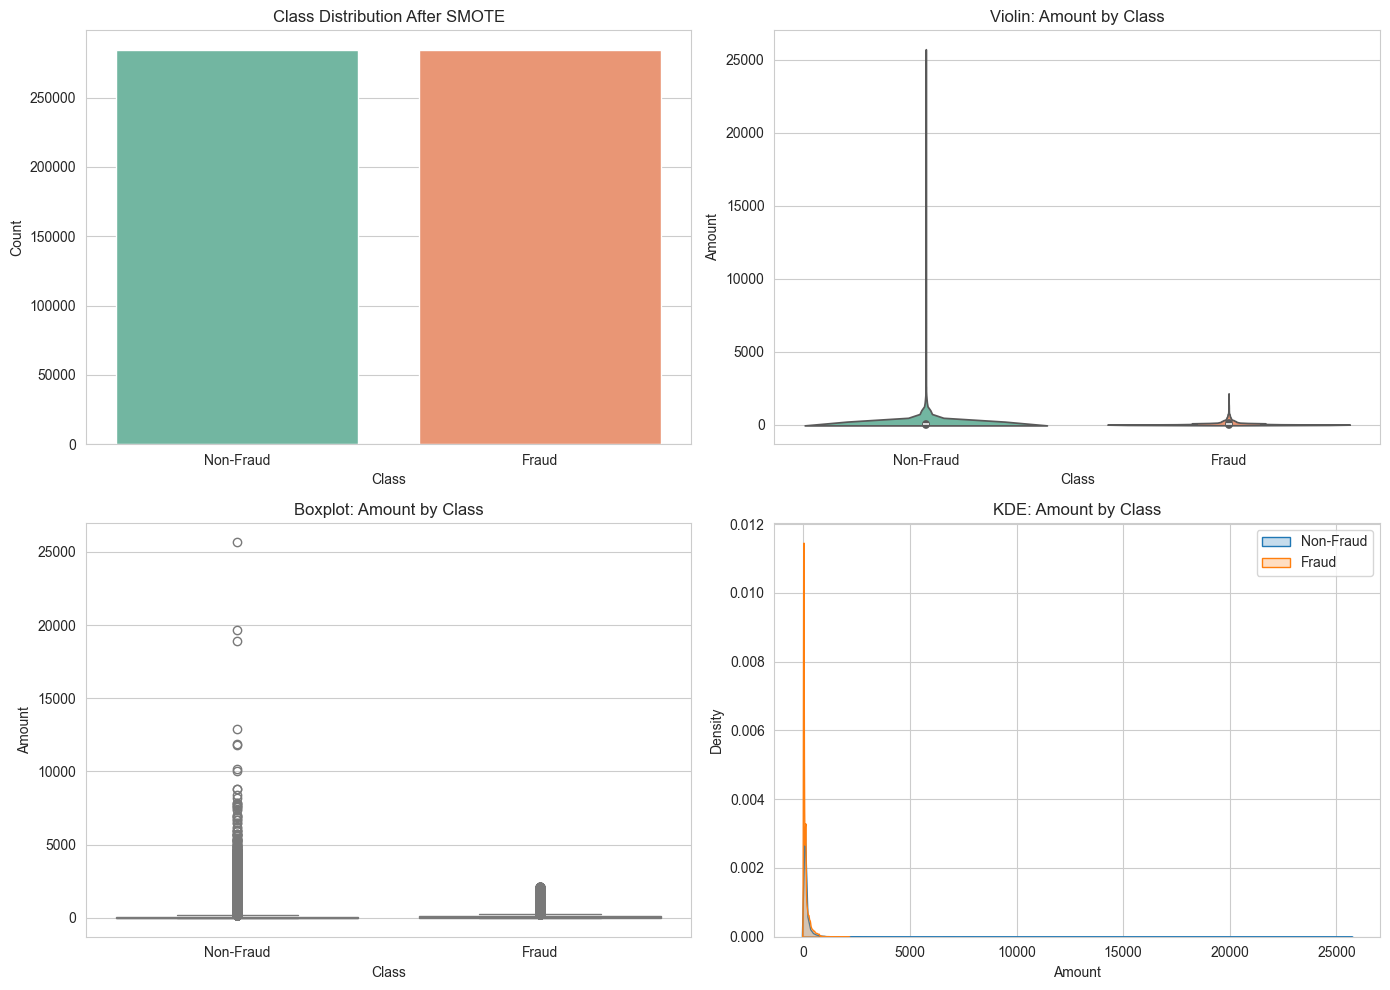

In [35]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Class Distribution (Bar Plot)
sns.countplot(x='Class', hue='Class', data=df, palette='Set2', legend=False, ax=axs[0, 0])
axs[0, 0].set_title('Class Distribution After SMOTE')
axs[0, 0].set_xlabel('Class')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_xticks([0, 1])
axs[0, 0].set_xticklabels(['Non-Fraud', 'Fraud'])

# 2. Violin Plot: Amount by Class
sns.violinplot(x='Class', y='Amount', data=df, hue='Class', palette='Set2', legend=False, ax=axs[0, 1])
axs[0, 1].set_title('Violin: Amount by Class')
axs[0, 1].set_xlabel('Class')
axs[0, 1].set_ylabel('Amount')
axs[0, 1].set_xticks([0, 1])
axs[0, 1].set_xticklabels(['Non-Fraud', 'Fraud'])

# 3. Boxplot: Amount by Class
sns.boxplot(x='Class', y='Amount', data=df, hue='Class', palette='coolwarm', legend=False, ax=axs[1, 0])
axs[1, 0].set_title('Boxplot: Amount by Class')
axs[1, 0].set_xlabel('Class')
axs[1, 0].set_ylabel('Amount')
axs[1, 0].set_xticks([0, 1])
axs[1, 0].set_xticklabels(['Non-Fraud', 'Fraud'])

# 4. KDE Plot: Amount Distribution
sns.kdeplot(df[df['Class'] == 0]['Amount'], label='Non-Fraud', fill=True, ax=axs[1, 1])
sns.kdeplot(df[df['Class'] == 1]['Amount'], label='Fraud', fill=True, ax=axs[1, 1])
axs[1, 1].set_title('KDE: Amount by Class')
axs[1, 1].set_xlabel('Amount')
axs[1, 1].set_ylabel('Density')
axs[1, 1].legend()

plt.tight_layout()
plt.show()


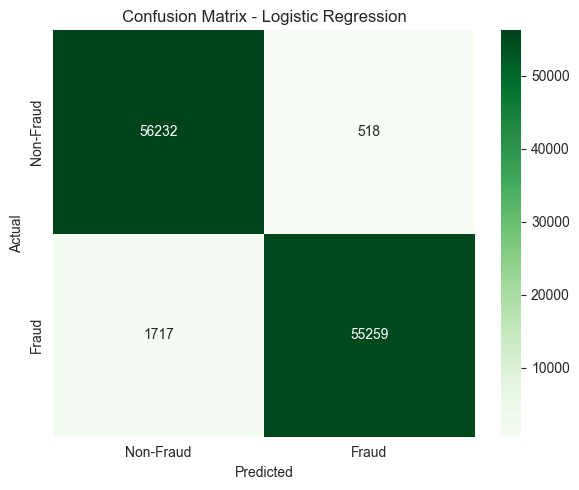

Metrics,Values
Accuracy,98.03%
Recall,96.99%
Precision,99.07%
F1 Score,0.980


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display, HTML

# Split and scale data
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with GridSearchCV
model = LogisticRegression(max_iter=1000)
param_grid = {"C": [1]}
grid = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc')
grid.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = grid.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()

# Metrics table
metrics_df = pd.DataFrame({
    'Metrics': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Values': [f"{accuracy*100:.2f}%", f"{recall*100:.2f}%", f"{precision*100:.2f}%", f"{f1:.3f}"]
})
display(HTML(metrics_df.to_html(index=False, justify='center')))


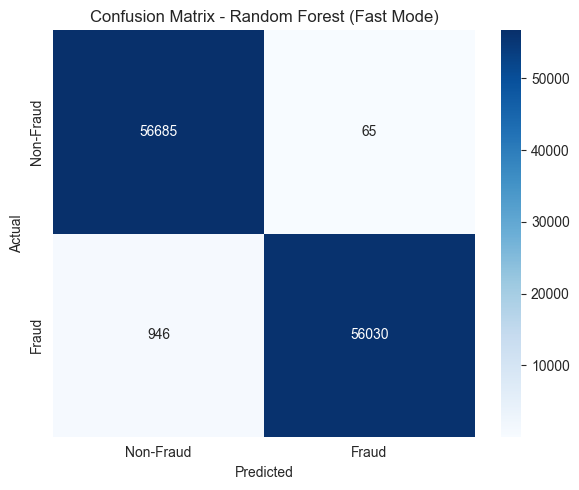

Metrics,Values
Accuracy,99.11%
Recall,98.34%
Precision,99.88%
F1 Score,0.991


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

# Train Random Forest
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Random Forest (Fast Mode)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Metrics table
metrics_df = pd.DataFrame({
    'Metrics': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Values': [f"{accuracy*100:.2f}%", f"{recall*100:.2f}%", f"{precision*100:.2f}%", f"{f1:.3f}"]
})
display(HTML(metrics_df.to_html(index=False, justify='center')))


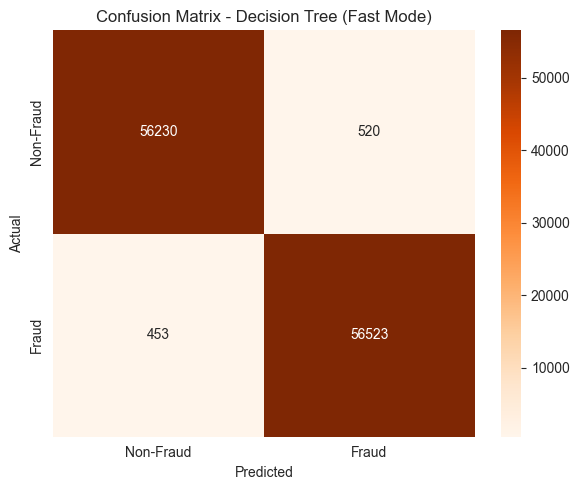

Metrics,Values
Accuracy,99.14%
Recall,99.20%
Precision,99.09%
F1 Score,0.991


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)

# Predict and evaluate
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Decision Tree (Fast Mode)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Metrics table
metrics_df = pd.DataFrame({
    'Metrics': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Values': [f"{accuracy*100:.2f}%", f"{recall*100:.2f}%", f"{precision*100:.2f}%", f"{f1:.3f}"]
})
display(HTML(metrics_df.to_html(index=False, justify='center')))


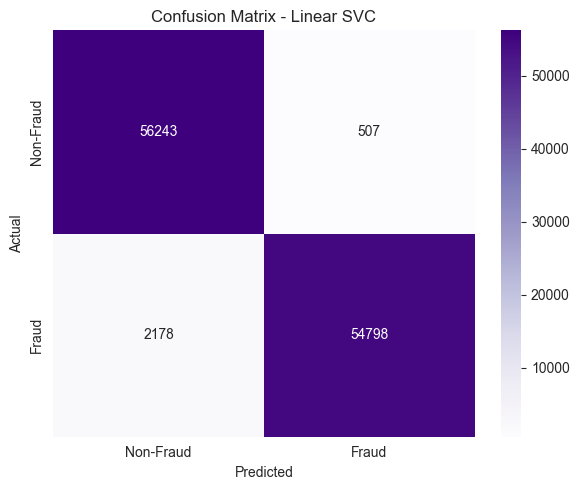

Metrics,Values
Accuracy,97.64%
Recall,96.18%
Precision,99.08%
F1 Score,0.976


In [11]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

# 1. Train LinearSVC (very fast)
svc = LinearSVC(C=1, max_iter=1000, random_state=42)
svc.fit(X_train_scaled, y_train)

# 2. Predict
y_pred = svc.predict(X_test_scaled)

# 3. Metrics
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 4. Confusion Matrix Plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Linear SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 5. Metrics Table
metrics_df = pd.DataFrame({
    'Metrics': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Values': [f"{accuracy*100:.2f}%", f"{recall*100:.2f}%", f"{precision*100:.2f}%", f"{f1:.3f}"]
})
display(HTML(metrics_df.to_html(index=False, justify='center')))


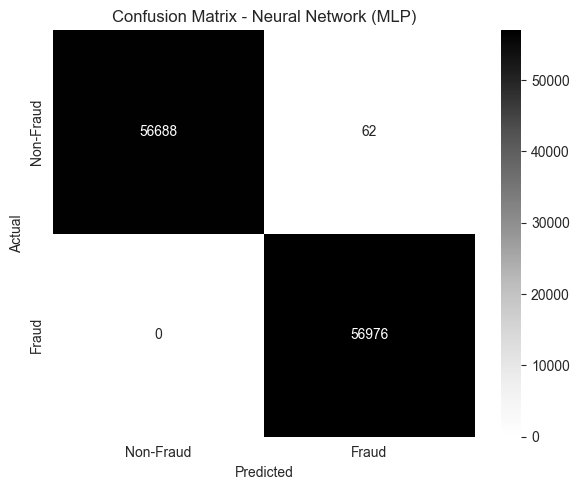

Metrics,Values
Accuracy,99.95%
Recall,100.00%
Precision,99.89%
F1 Score,0.999


In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display, HTML

# Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix plot
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
            xticklabels=["Non-Fraud", "Fraud"],
            yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - Neural Network (MLP)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Metrics table
metrics_df = pd.DataFrame({
    'Metrics': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Values': [f"{accuracy*100:.2f}%", f"{recall*100:.2f}%", f"{precision*100:.2f}%", f"{f1:.3f}"]
})
display(HTML(metrics_df.to_html(index=False, justify='center')))

